### Machine Learning Tutorial Python - 4: Gradient Descent and Cost Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 10000
    rate = 0.01
    n = len(x)
    plt.figure(figsize=(16, 9))
    plt.scatter(x, y, color='red', marker='+', linewidth=5)
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y - y_predicted)])
        # print(f"m: {m_curr}, b: {b_curr}, i: {i}")
        plt.plot(x, y_predicted, color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd
    print(f"mse: {cost}")

In [3]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

mse: 1.0414541670727798e-27
CPU times: user 4.15 s, sys: 85.6 ms, total: 4.24 s
Wall time: 4.23 s


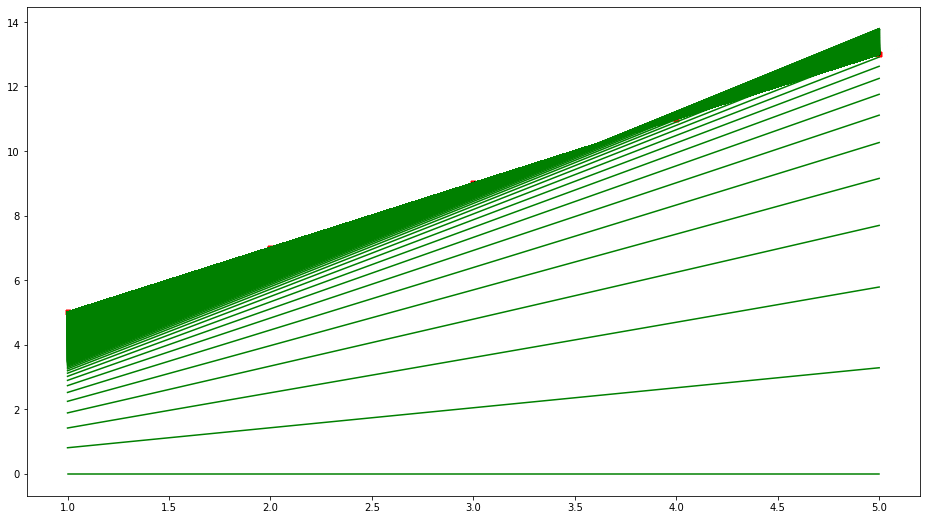

In [4]:
%%time
gradient_descent(x,y)

### Exercise

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

In [6]:
def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        # print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

In [7]:
%%time

df = pd.read_csv("test_scores.csv")
x = np.array(df.math)
y = np.array(df.cs)

m, b = gradient_descent(x,y)
print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Using gradient descent function: Coef 1.0177381667350405 Intercept 1.9150826165722297
Using sklearn: Coef [1.01773624] Intercept 1.9152193111569034
CPU times: user 5.05 s, sys: 7.63 ms, total: 5.06 s
Wall time: 5.05 s
